<a href="https://colab.research.google.com/github/davidivan13/Python-for-Data-Science/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks

Demonstrasi [Convolutional Neural Network](https://developers.google.com/machine-learning/glossary/#convolutional_neural_network) (CNN) yang simple untuk klasifikasi [CIFAR images](https://www.cs.toronto.edu/~kriz/cifar.html).


## Import Library

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt

## Download and prepare the CIFAR10 dataset

Dataset CIFAR10 berisi 60.000 gambar berwarna yang terbagi dalam 10 kelas, dengan 6.000 gambar dalam setiap kelas. Dataset ini dibagi menjadi 50.000 gambar latihan dan 10.000 gambar uji. Kelas-kelas tersebut saling eksklusif dan tidak ada tumpang tindih di antara mereka.

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalisasikan nilai piksel agar berada di antara 0 dan 1.
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## Verifikasi Data

 Untuk memverifikasi bahwa dataset terlihat benar, mari plot gambar pertama dari set pelatihan dan tampilkan nama kelas di bawah setiap gambar.:


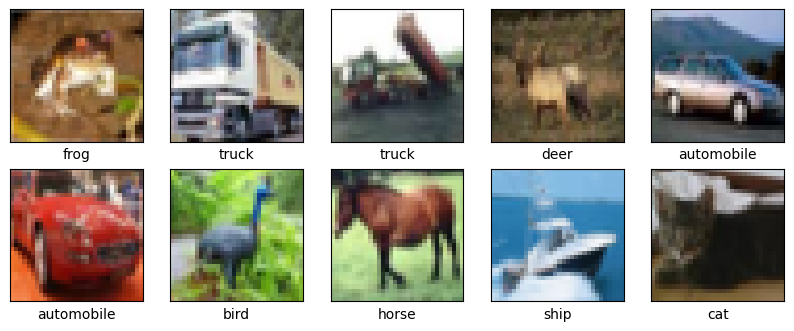

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Build CNN Model

Sebagai input, CNN mengambil tensor berbentuk (tinggi_gambar, lebar_gambar, saluran_warna), tanpa memperhatikan ukuran batch. Jika Anda baru mengenal dimensi-dimensi ini, saluran_warna merujuk pada (R, G, B). Dalam contoh ini, Anda akan mengonfigurasi CNN Anda untuk memproses input berbentuk (32, 32, 3), yang merupakan format gambar CIFAR. Anda dapat melakukannya dengan melewatkan argumen `input_shape` ke lapisan pertama Anda.


In [4]:
def create_model():
  model = models.Sequential()

  # Convolutional layers
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(128, (3, 3), activation='relu'))  # Additional convolutional layer for more complexity
  model.add(layers.MaxPooling2D((2, 2)))

  # Flatten layer
  model.add(layers.Flatten())

  # # Dense layers with dropout for regularization
  # model.add(layers.Dense(256, activation='relu'))
  # model.add(layers.Dropout(0.5))  # Dropout for regularization

  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(0.5))  # Dropout for regularization

  # Output layer
  model.add(layers.Dense(10, activation='softmax'))


  # Compile the model
  model.compile(
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      optimizer=optimizers.Adam(),
      metrics=['accuracy']
  )

  return model

In [5]:
model = create_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

### Train & evaluate the model

In [6]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 48ms/step - accuracy: 0.3027 - loss: 1.8651 - val_accuracy: 0.5362 - val_loss: 1.2943
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 47ms/step - accuracy: 0.5241 - loss: 1.3324 - val_accuracy: 0.5447 - val_loss: 1.3183
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.5831 - loss: 1.1707 - val_accuracy: 0.6343 - val_loss: 1.0206
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.6341 - loss: 1.0441 - val_accuracy: 0.6439 - val_loss: 1.0112
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.6742 - loss: 0.9395 - val_accuracy: 0.6874 - val_loss: 0.9031
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.7013 - loss: 0.8636 - val_accuracy: 0.7051 - val_loss: 0.8630
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 48ms/step - accuracy: 0.7197 - loss: 0.8042 - val_accuracy: 0.7105 - val_loss: 0.8381
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.7414 -

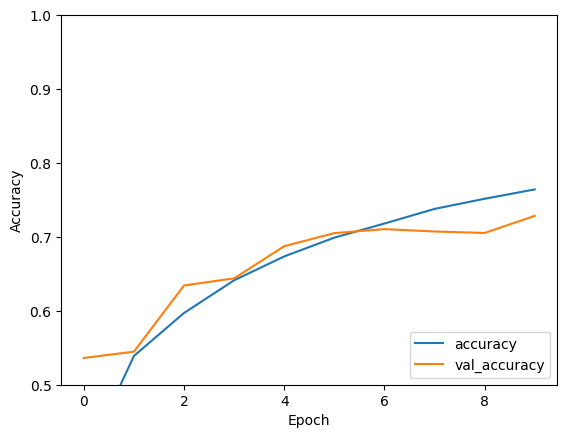

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

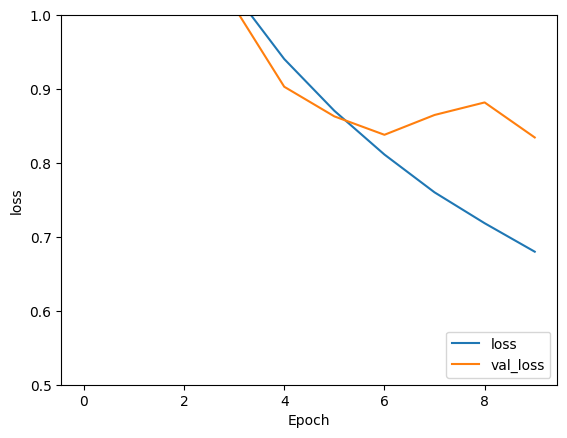

In [8]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')